In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 4 

In the following problem we consider the nonlinear System

\begin{align*}
\begin{cases}
e^{x_1^2 + x_2^2} - 1 = 0 \\
e^{x_1^2 - x_2^2} - 1 = 0
\end{cases}
\end{align*}

which has the solution $x^* = (0,0)$.

### Part a) (Simplified Newton's Method)

Implement the simplified Netons Method for the given sytem. The Jacobian of the Sytem can be calculated analytically or with finite differences.

#### Simplified Newton's Method

For this Newtons Method the Jacobian is calculated only once at the begining and then used for all iterations.

**Algorithm**

1. choose an initial guess $x^{(0)}$
2. Solve $f'(x^{(0)}) \Delta x^{(0)} = -f(x^{(0)})$ for $\Delta x^{(0)}$
3. Set $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$

We set our Fixed Point Iteration

\begin{align*}
\Phi(x) := x - [f'(x^{(0)})]^{-1} f(x)
\end{align*}

In [170]:
# System

def F(x):
    return np.array([np.exp(x[0]**2 + x[1]**2)-1, np.exp(x[0]**2 - x[1]**2)-1])

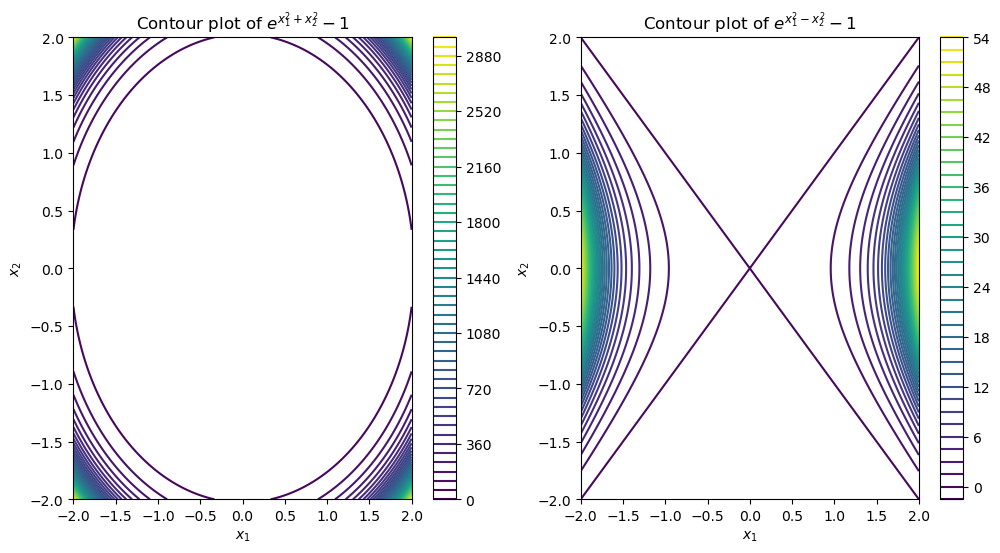

In [171]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(X**2 + Y**2) - 1
Z2 = np.exp(X**2 - Y**2) - 1

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


# Contour Plot 1
contour1 = ax[0].contour(X, Y, Z1, levels=50, cmap='viridis')

ax[0].set_title('Contour plot of $e^{x_1^2 + x_2^2} - 1$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
fig.colorbar(contour1, ax=ax[0])

# Contour Plot 2
contour2 = ax[1].contour(X, Y, Z2, levels=50, cmap='viridis')
ax[1].set_title('Contour plot of $e^{x_1^2 - x_2^2} - 1$')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
fig.colorbar(contour2, ax=ax[1])

plt.show()

# Analytical Jacobian

General form of the Jacobian is given by

\begin{align*}
J(x) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{pmatrix}
\end{align*}


The Jacobian of the System is given by



\begin{align*}
J(x) = \begin{pmatrix}
2 x_1 e^{x_1^2 + x_2^2} & 2 x_2 e^{x_1^2 + x_2^2} \\
2 x_1 e^{x_1^2 - x_2^2} & -2 x_2 e^{x_1^2 - x_2^2}
\end{pmatrix}
\end{align*}

In [172]:
def J(x):
    return np.array([[2*x[0]*np.exp(x[0]**2 + x[1]**2), 2*x[1]*np.exp(x[0]**2 + x[1]**2)],
                        [2*x[0]*np.exp(x[0]**2 - x[1]**2), -2*x[1]*np.exp(x[0]**2 - x[1]**2)]])



In [173]:
def simplified_newtons_method(x0, f, tol=1e-6):
    x = x0
    true_solution = np.array([0, 0])
    # Calculate Jacobian for Initial Guess
    Jx = J(x)
    # Track Iterations
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]
    while True:
        # Calculate F(x)
        Fx = f(x)
        # Solve for dx
        dx = np.linalg.solve(Jx, -Fx)
        # Update x
        x = x + dx

        # Calculate error to true sol.
        err_k.append(np.linalg.norm(x - true_solution))

        err_tol = np.linalg.norm(dx)
        nit += 1
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
    return x, err_k, nit

x0 = np.array([0.5, 0.5])
x,err_k,nit = simplified_newtons_method(x0, F)

Iteration 1: x = [0.30326533 0.30326533], err = 0.27822483870619413
Iteration 2: x = [0.24202291 0.24202291], err = 0.08660986414057423
Iteration 3: x = [0.20433059 0.20433059], err = 0.053304989385315735
Iteration 4: x = [0.17792001 0.17792001], err = 0.03735019873495623
Iteration 5: x = [0.15809914 0.15809914], err = 0.02803094208789784
Iteration 6: x = [0.14255337 0.14255337], err = 0.02198504359450563
Iteration 7: x = [0.12997387 0.12997387], err = 0.017790088299043723
Iteration 8: x = [0.11955257 0.11955257], err = 0.01473795315611214
Iteration 9: x = [0.11075844 0.11075844], err = 0.012436771444776298
Iteration 10: x = [0.10322584 0.10322584], err = 0.010652707650423343
Iteration 11: x = [0.09669355 0.09669355], err = 0.009238053859960587
Iteration 12: x = [0.09096935 0.09096935], err = 0.008095237502686268
Iteration 13: x = [0.08590829 0.08590829], err = 0.007157426471763883
Iteration 14: x = [0.08139875 0.08139875], err = 0.006377449437932367
Iteration 15: x = [0.07735328 0.077

#### Normal Newton Method

For the normal Newton Method the Jacobian is calculated in every iteration.

**Algorithm**
1. choose an initial guess $x^{(0)}$
2. $\Delta x^{(k)} = -[f'(x^{(k)})]^{-1} f(x^{(k)})$
3. $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$

In [174]:
def newton_algorithm(x0,f, tol=1e-6,):
    """
    Implementation of the Newtons algorithm for the given sytem with
    calculation of the error and the number of iterations.
    """
    true_solution = np.array([0, 0])
    x = x0
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]


    while True:
        Fx = f(x)
        Jx = J(x)
        dx = np.linalg.solve(Jx, -Fx)
        x = x + dx
        # Calculate Error to True solution
        err_k.append(np.linalg.norm(x - true_solution))
        # Calculate the Error for Tolerance
        err_tol = np.linalg.norm(dx)
        nit += 1
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
    return x, err_k, nit

x0 = np.array([0.5, 0.5])
x, err_k, nit = newton_algorithm(x0, F)

print(err_k)

Iteration 1: x = [0.30326533 0.30326533], err = 0.27822483870619413
Iteration 2: x = [0.16476116 0.16476116], err = 0.19587446965846314
Iteration 3: x = [0.08457698 0.08457698], err = 0.1133975652054074
Iteration 4: x = [0.04258955 0.04258955], err = 0.0593791859638611
Iteration 5: x = [0.02133336 0.02133336], err = 0.03006080147496808
Iteration 6: x = [0.01067153 0.01067153], err = 0.015078096824367292
Iteration 7: x = [0.00533637 0.00533637], err = 0.007545052401640965
Iteration 8: x = [0.00266826 0.00266826], err = 0.003773278023626232
Iteration 9: x = [0.00133414 0.00133414], err = 0.0018867330311558178
Iteration 10: x = [0.00066707 0.00066707], err = 0.0009433782692785177
Iteration 11: x = [0.00033354 0.00033354], err = 0.00047169060394311625
Iteration 12: x = [0.00016677 0.00016677], err = 0.00023584548551084582
Iteration 13: x = [8.33839919e-05 8.33839919e-05], err = 0.00011792276587174217
Iteration 14: x = [4.16919963e-05 4.16919963e-05], err = 5.8961385681699936e-05
Iteration 

#### Convergence Plot

We define the error as

\begin{align*}
e^{(k)} = x^{(k)} - a
\end{align*}

where $a = (0,0)$ is the true solution. We plot number of iterations agains $log_{10}(||e^{(k)}||)$

In [175]:
# Initial point
x0 = np.array([0.5, 0.5])
# Vary this for plot

tol = 1e-2


x_newton, err_k_newton, nit_newton = newton_algorithm(x0, F,tol=tol)

# Simplified Newton
x_newton_simp, err_k_newton_simp, nit_newton_simp = simplified_newtons_method(x0, F, tol=tol)


Iteration 1: x = [0.30326533 0.30326533], err = 0.27822483870619413
Iteration 2: x = [0.16476116 0.16476116], err = 0.19587446965846314
Iteration 3: x = [0.08457698 0.08457698], err = 0.1133975652054074
Iteration 4: x = [0.04258955 0.04258955], err = 0.0593791859638611
Iteration 5: x = [0.02133336 0.02133336], err = 0.03006080147496808
Iteration 6: x = [0.01067153 0.01067153], err = 0.015078096824367292
Iteration 7: x = [0.00533637 0.00533637], err = 0.007545052401640965
Iteration 1: x = [0.30326533 0.30326533], err = 0.27822483870619413
Iteration 2: x = [0.24202291 0.24202291], err = 0.08660986414057423
Iteration 3: x = [0.20433059 0.20433059], err = 0.053304989385315735
Iteration 4: x = [0.17792001 0.17792001], err = 0.03735019873495623
Iteration 5: x = [0.15809914 0.15809914], err = 0.02803094208789784
Iteration 6: x = [0.14255337 0.14255337], err = 0.02198504359450563
Iteration 7: x = [0.12997387 0.12997387], err = 0.017790088299043723
Iteration 8: x = [0.11955257 0.11955257], err 

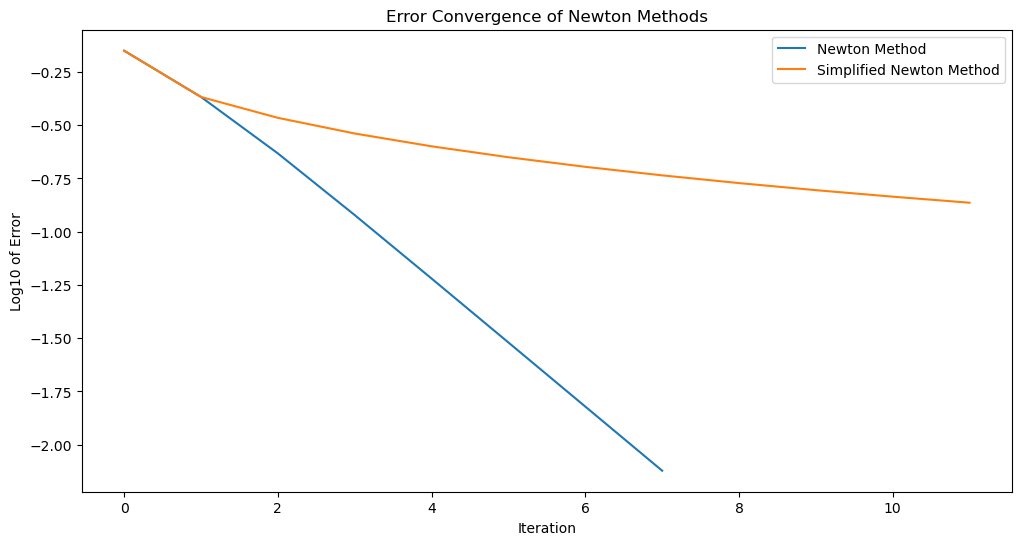

In [176]:
# Take Log10 of norm of error

err_k_log_newton = np.log10(err_k_newton)
err_k_log_newton_simp = np.log10(err_k_newton_simp)



# Plot 

plt.figure(figsize=(12, 6))
plt.plot(err_k_log_newton, label='Newton Method')
plt.plot(err_k_log_newton_simp, label='Simplified Newton Method')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.title('Error Convergence of Newton Methods')
plt.legend()
plt.show()


### Part b) Convergence Improvment Through Epsilon Algorithm

Improve the Convergence of the Simplified Newton Method by using the Epsilon Algorithm


#### Epsilon Algorithm

Let $\{S_1,S_2,S_3...\}$ be a sequence. For $n \geq 1$ we define

\begin{align*}
\epsilon_{-1}^{(n)}:= 0 ~  \epsilon_0^{(n)} := S_n ~ \epsilon_{k+1}^{(n)} := \epsilon_{k-1}^{(n+1)} + \frac{1}{\epsilon_k^{(n+1)} - \epsilon_{k}^{(n)}}
\end{align*}

Then we have $\epsilon_2^{(n)}= S', \epsilon_4^{(n)} = S'' ...$ 

In [177]:
def epsilon_algorithm(S):
    n = len(S)
    epsilon = np.zeros((n, n))
    epsilon[:, 0] = S
    for k in range(1, n):
        for i in range(n - k):
            epsilon[i, k] = epsilon[i + 1, k - 1] + 1 / (epsilon[i + 1, k] - epsilon[i, k - 1])
    return epsilon

In [178]:
S = np.array(err_k_newton_simp)
S_epsilon = epsilon_algorithm(S)


In [179]:
# Select all the Second Rows

S_epsilon = S_epsilon[:,::2]
print(S_epsilon)

[[ 0.70710678 -0.97448516 -1.45372829 -2.50719639 -3.46404983 -4.37498377]
 [ 0.42888194 -2.13001398 -2.66183212 -3.39649371 -4.21016597 -5.05468467]
 [ 0.34227208 -2.82914449 -3.38947704 -4.09206666 -4.86750944  0.        ]
 [ 0.28896709 -3.43908502 -4.02333194 -4.71786232 -5.47611178  0.        ]
 [ 0.25161689 -4.0043359  -4.60883555 -5.3030091   0.          0.        ]
 [ 0.22358595 -4.54234456 -5.16417966 -5.86110715  0.          0.        ]
 [ 0.2016009  -5.06194439 -5.69878503  0.          0.          0.        ]
 [ 0.18381082 -5.56826723 -6.21823146  0.          0.          0.        ]
 [ 0.16907286 -6.06456907  0.          0.          0.          0.        ]
 [ 0.15663609 -6.55304775  0.          0.          0.          0.        ]
 [ 0.14598338  0.          0.          0.          0.          0.        ]
 [ 0.13674533  0.          0.          0.          0.          0.        ]]


[-0.97448516 -2.13001398 -2.82914449 -3.43908502 -4.0043359  -4.54234456
 -5.06194439 -5.56826723 -6.06456907 -6.55304775]
[-1.45372829 -2.66183212 -3.38947704 -4.02333194 -4.60883555 -5.16417966
 -5.69878503 -6.21823146]


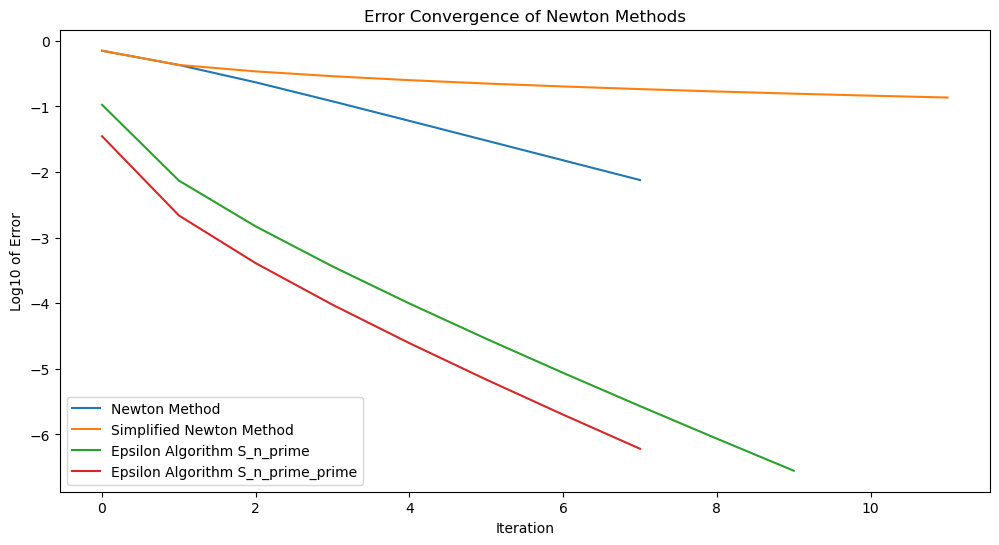

In [180]:
# Plot Newton, Simplified Netwon and Epsilon Algorithm

S_n_prime = S_epsilon[:,1]
# Drop all the Zeros
S_n_prime = S_n_prime[S_n_prime != 0]
S_n_prime_prime = S_epsilon[:,2]
S_n_prime_prime = S_n_prime_prime[S_n_prime_prime != 0]

print(S_n_prime)
print(S_n_prime_prime)

plt.figure(figsize=(12, 6))
plt.plot(err_k_log_newton, label='Newton Method')
plt.plot(err_k_log_newton_simp, label='Simplified Newton Method')
plt.plot(S_n_prime, label='Epsilon Algorithm S_n_prime')
plt.plot(S_n_prime_prime, label='Epsilon Algorithm S_n_prime_prime')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.title('Error Convergence of Newton Methods')
plt.legend()
plt.show()

### Part c) Broyden's Method

A shortcoming of the Newtons's Method for nonlinear equations is that the derivatives required for the Jacobian are difficult, expensive to calculate.

**Secant Methods** known as quasi-newton methods, do not require the calculation of the Jacobian. They construct and approximation to the matrix.

Let $B_k$ be Jacobian approximation at the $k$-th iteration. Let $s_k = x_{k+1} - x_k$. Then the ubdated Jacobian $B_{k+1}$ must satisfy the secant equation

$B_{k+1}s_k = f(x_{k+1}) - f(x_k)$

Given a Initial Matrix $B_0$ obtained by finite differences, Broydens method generates subsequent matrices by update formula

\begin{align*}
B_{k+1} = B_k + \frac{(y_k - B_k s_k)s_k^T}{||s_k||^2_2}
\end{align*}

where $y_k = f(x_{k+1}) - f(x_k)$

Remember finite differences

\begin{align*}
\frac{\partial f_i}{\partial x_j} \approx \frac{f_i(x + \epsilon e_j) - f_i(x)}{\epsilon}
\end{align*}

In [181]:

def finite_difference_jacobian(f, x, h=1e-5):
    """
    Calculates the Jacobian of a Function using finite differences
    """

    n = len(x) # Variables
    m = len(f(x)) # Functions
    J = np.zeros((m,n))
    for j in range(n):
        # Perturb the j_th component of x
        x_perturbed = x.copy()
        x_perturbed[j] += h
        # Calculate the Finite Difference
        J[:, j] = (f(x_perturbed) - f(x)) / h
    return J


def broyden_method(x0, f, tol=1e-7, max_iter=100):
    """
    Implementation of Broyden's method for solving nonlinear equations.
    """
    true_solution = np.array([0, 0])
    x = x0
    nit = 0
    err_k = [np.linalg.norm(x - true_solution)]
    # Initial Guess with Finite Differences
    B_k = finite_difference_jacobian(f, x)
    while True: 
        Fx = F(x)
        dx = np.linalg.solve(B_k, -Fx)
        # Update x
        x_new = x + dx
        # Calculate Error to True solution
        err_k.append(np.linalg.norm(x - true_solution))
        # Calculate the Error for Tolerance
        err_tol = np.linalg.norm(dx)
        nit += 1
        
        # Update Broyden Matrix
        Fx_new = F(x_new)
        y = Fx_new - Fx
        s = x_new - x
        
        # Use outer product for update
        B_k = B_k + np.outer(y - np.dot(B_k, s), s) / np.linalg.norm(s)**2

        x = x_new
        print(f'Iteration {nit}: x = {x}, err = {err_tol}')
        if err_tol < tol:
            break
        if nit > max_iter:
            break
    return x, err_k, nit, B_k

        



x0 = np.array([0.5, 0.5])
x, err_k, nit, B_k = broyden_method(x0, F)

print(B_k)

Iteration 1: x = [0.30326926 0.3032673 ], err = 0.278220665368607
Iteration 2: x = [0.21434346 0.21434234], err = 0.12575947972588833
Iteration 3: x = [0.13338303 0.13338251], err = 0.11449491564426702
Iteration 4: x = [0.0845204  0.08452017], err = 0.0691019830360526
Iteration 5: x = [0.052315   0.05231494], err = 0.04554519670166505
Iteration 6: x = [0.03245626 0.03245629], err = 0.028084430789965885
Iteration 7: x = [0.02006371 0.02006378], err = 0.017525690702909623
Iteration 8: x = [0.01240699 0.0124071 ], err = 0.010828206902899025
Iteration 9: x = [0.00766818 0.0076683 ], err = 0.006701686047572435
Iteration 10: x = [0.00473956 0.00473968], err = 0.004141690350174983
Iteration 11: x = [0.0029292  0.00292933], err = 0.0025602348167445216
Iteration 12: x = [0.00181034 0.00181047], err = 0.0015823021591825771
Iteration 13: x = [0.00111883 0.00111896], err = 0.0009779460244574642
Iteration 14: x = [0.00069145 0.00069158], err = 0.000604403327138138
Iteration 15: x = [0.00042731 0.00

In [182]:

J_analytical = J(np.array([0, 0]))

print("Analytical Jacobian at (0,0):")
print(J_analytical)

print("\nFinal Broyden Jacobian:")
print(B_k)


difference = np.linalg.norm(J_analytical - B_k)
print("\nDifference between analytical and Broyden Jacobian:")
print(difference)

Analytical Jacobian at (0,0):
[[0. 0.]
 [0. 0.]]

Final Broyden Jacobian:
[[-1.59112555e-06  1.91105728e-06]
 [ 1.00001342e+00 -1.00000658e+00]]

Difference between analytical and Broyden Jacobian:
1.4142277045351364


# Exercise 5

Implement the Gauß-Newton Method. For this we need **population.csv** and **temperature.csv**. 

We fit the following two Models

**Population Model**

\begin{align*}
\Phi(x,t) = x_1 e^{x_2t}
\end{align*}

**Temperature Model**

\begin{align*}
\Phi(x,t) = x_1 *sin(x_2t + x_3) + x_4
\end{align*}


### Short Theory Intoduction

Gauß-Newton Algorithm is iterative optimization method used to solve non-linear least squares problem. Goal is to minimize the sum of squared residuals between observed and predicted values. 

The general update rule for the Gauß-Newton Method is given by

\begin{align*}
\theta^{(t+1)} = \theta^{(t)} - (J^TJ)^{-1}J^T r(\theta^{(t)})
\end{align*}

where $J$ is the Jacobian of the residual function $r(\theta)$ and $\theta$ is the parameter estimate at iteration $t$

#### Step 1 Define the Residuals

The residuals $r(\theta)$ represent the differences between the observed values and the values predicted by the model.

In [ ]:
def population_model(x,t):
    return x[0]*np.exp(x[1]*t)

def temperature_model(x,t):
    return x[0]*np.sin(x[1]*t + x[2]) + x[3]

def residuals_population(x,t,y):
    """ 
    Residuals for the population model
    """
    return y - population_model(x,t)

def residuals_temperature(x,t,y):
    """ 
    Residuals for the temperature model
    """
    return y - temperature_model(x,t)

#### Step 2 Define the Jacobian Matrix

The Jacobian is the matrix of all first-order partial derivatives of the residuals with respect to the parameters.

\begin{align*}
J_{ij} = \frac{\partial r_i}{\partial \theta_j}
\end{align*}

In [394]:
def jacobian_population(x,t):
    """"
    Jacobian Matrix for the Temperature Model
    """
    J = np.zeros((len(t), len(x)))

    J[:, 0] = np.exp(x[1]*t)
    J[:, 1] = x[0]*t*np.exp(x[1]*t)
    return J

def jacobian_temperature(x,t):
    """"
    Jacobian Matrix for the Temperature Model
    """
    J = np.zeros((len(t), len(x)))

    J[:,0] = np.sin(x[1]*t + x[2])
    J[:,1] = x[0]*t*np.cos(x[1]*t + x[2])
    J[:,2] = x[0]*np.cos(x[1]*t + x[2])
    J[:,3] = 1
    return J

Now lets implement the Gauss-Newton Method. As stated above the iteration step is given by

\begin{align*}
\theta^{(t+1)} = \theta^{(t)} - (J^TJ)^{-1}J^T r(\theta^{(t)})
\end{align*}

Basically the update $\Delta = \theta^{(t+1)} - \theta^{(t)}$ is given by

\begin{align*}
\Delta = - (J^TJ)^{-1}J^T r(\theta^{(t)})
\end{align*}

This can be rearanged into a linear system

\begin{align*}
J^TJ \Delta = -J^T r(\theta^{(t)})
\end{align*}

In [395]:
def gauss_newton(x0,t,y,residuals,jacobian,tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)

    for i in range(max_iter):
        r = residuals(x,t,y)
        J = jacobian(x,t)
        A = J.T @ J
        b = - J.T @ r
        dx = np.linalg.solve(A,b)
        x = x + dx
        if np.linalg.norm(dx) < tol:
            break

    return x

Import the data using the np.genfromtxt function. The data is stored in the files **population.csv** and **temperature.csv**.

In [396]:
# Load in Data

population_data = np.genfromtxt("population.csv", delimiter=",")
print(population_data) 

temperature_data = np.genfromtxt("temperature.csv", delimiter=",")
print(temperature_data)

[[1815.     8.3]
 [1825.    11. ]
 [1835.    14.7]
 [1845.    19.7]
 [1855.    26.7]
 [1865.    35.2]
 [1875.    44.4]
 [1885.    55.9]]
[[ 1. 61.]
 [ 2. 65.]
 [ 3. 72.]
 [ 4. 78.]
 [ 5. 85.]
 [ 6. 90.]
 [ 7. 92.]
 [ 8. 92.]
 [ 9. 88.]
 [10. 81.]
 [11. 72.]
 [12. 63.]]


In [397]:
# Fit the population model

x0 = np.array([0.001, 0.02])

t = population_data[:,0]

y = population_data[:,1]

x_population = gauss_newton(x0,t,y,residuals_population,jacobian_population)
print(x_population)

# Plot the population model

t_fit = np.linspace(1815, 1885,100)
y_fit = population_model(x_population,t_fit)

plt.figure(figsize=(12,6))
plt.plot(t,y,'ro', label='Data')
plt.plot(t_fit,y_fit, label='Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Model Fit')
plt.legend()
plt.show()


LinAlgError: Singular matrix

/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_4833/2334034953.py:4: RuntimeWarning: overflow encountered in exp
  return x[0]*np.exp(x[1]*t)
/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_4833/2403201858.py:7: RuntimeWarning: overflow encountered in exp
  J[:, 0] = np.exp(x[1]*t)
/var/folders/zl/tr4yyt811072b_l4prllbb4m0000gn/T/ipykernel_4833/2403201858.py:8: RuntimeWarning: overflow encountered in exp
  J[:, 1] = x[0]*t*np.exp(x[1]*t)


[[9.00171313e+01 8.10154182e+03]
 [1.80804241e+03 2.71206362e+05]
 [3.63155027e+04 7.62625556e+06]
 [7.29416370e+05 1.96942420e+08]
 [1.46507194e+07 4.83473741e+09]
 [2.94267566e+08 1.14764351e+11]
 [5.91052206e+09 2.65973493e+12]
 [1.18716009e+11 6.05451647e+13]]
[[9.00171311e+01 8.78040865e-05]
 [1.80804241e+03 2.93932037e-03]
 [3.63155025e+04 8.26529587e-02]
 [7.29416366e+05 2.13445164e+00]
 [1.46507193e+07 5.23986310e+01]
 [2.94267564e+08 1.24381002e+03]
 [5.91052201e+09 2.88260678e+04]
 [1.18716008e+11 6.56185322e+05]]
[[7.55557859e+01 7.36707434e-05]
 [1.35034958e+03 2.19443280e-03]
 [2.41337438e+04 5.49071381e-02]
 [4.31323561e+05 1.26168739e+00]
 [7.70870927e+06 2.75600767e+01]
 [1.37771743e+08 5.82116051e+02]
 [2.46228680e+09 1.20042758e+04]
 [4.40065297e+10 2.43148790e+05]]
[[4.96061892e+01 1.16267741e-04]
 [6.69719754e+02 2.61616559e-03]
 [9.04170540e+03 4.94482024e-02]
 [1.22069621e+05 8.58325907e-01]
 [1.64802896e+06 1.41631430e+01]
 [2.22495936e+07 2.25978724e+02]
 [3.003

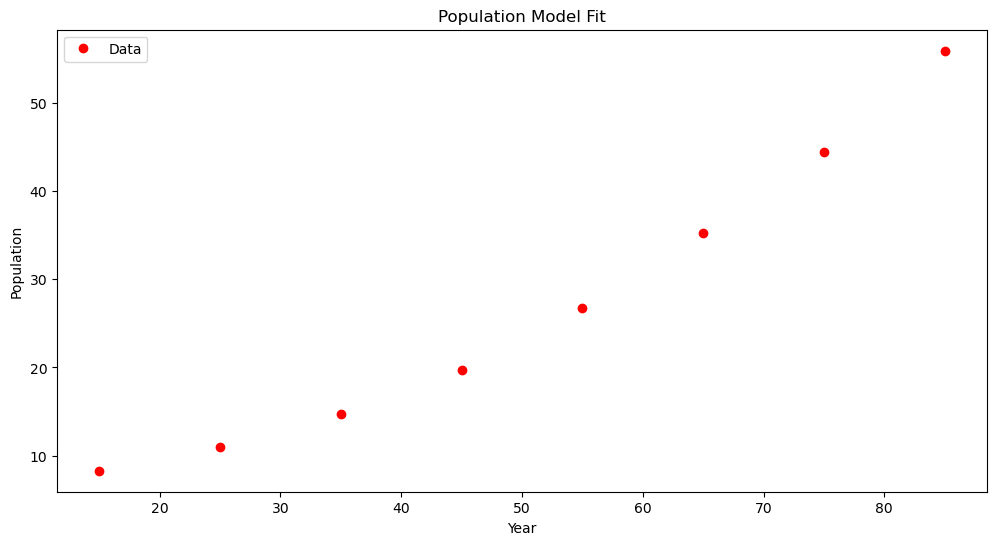

In [ ]:
# Now use the Values 15,20,85

x0 = np.array([6,0.3])
t = np.linspace(15,85,len(population_data))
y = population_data[:,1]

x_population = gauss_newton(x0,t,y,residuals_population,jacobian_population)
print(x_population)

# Plot the population model
plt.figure(figsize=(12,6))
plt.plot(t,y,'ro', label='Data')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Model Fit')
plt.legend()
plt.show()

[16.63994553  0.46327812 10.85228918 76.19086107]


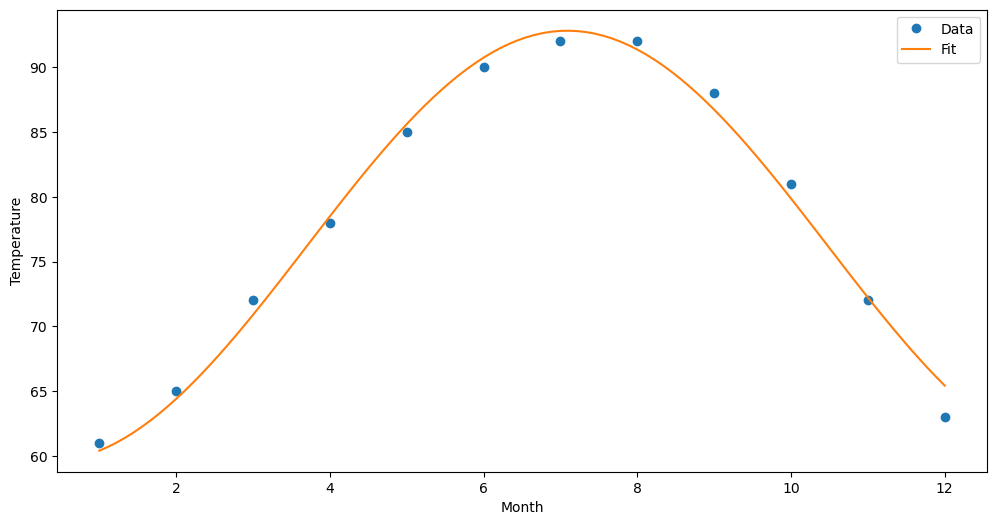

In [ ]:
# Fit the Temperature Model

x0 = np.array([17,0.5,10.5,77])

t = temperature_data[:,0]
y = temperature_data[:,1]

x_temperature = gauss_newton(x0,t,y,residuals_temperature,jacobian_temperature)
print(x_temperature)

# Plot the Temperature Model

t_fit = np.linspace(1, 12, 100)
y_fit = temperature_model(x_temperature, t_fit)

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='Data')
plt.plot(t_fit, y_fit, label='Fit')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.show()

#### exercise b)

Linearize the population model through logarithm transformation and then do a linear regression and calculate the parameter of the model

\begin{align*}
\Phi(x,t) = x_1 e^{x_2t}
\end{align*}

After Transformation we get

\begin{align*}
\log(\Phi(x,t)) = \log(x_1) + x_2t
\end{align*}

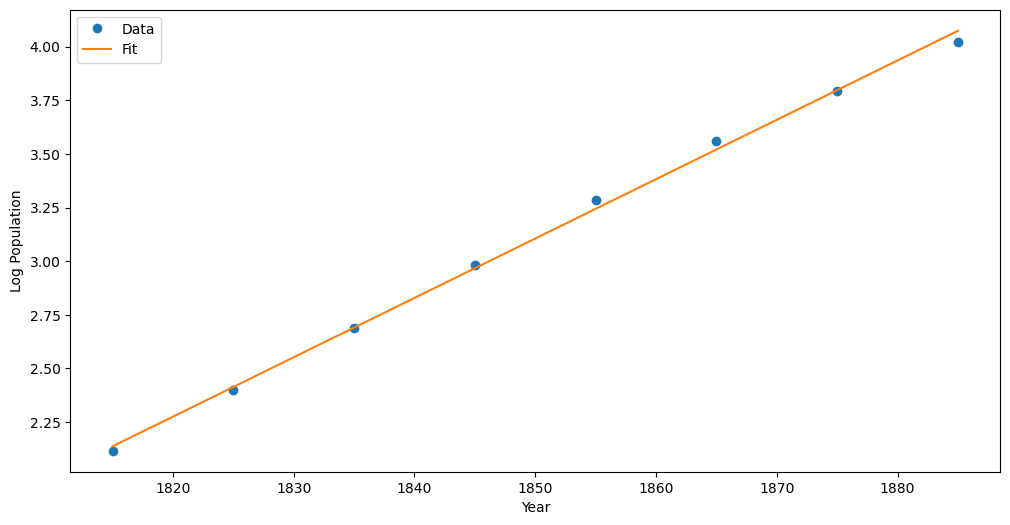

In [ ]:
from scipy import stats

log_y = np.log(population_data[:,1])
t = population_data[:,0]

slope, intercept, r_value, p_value, std_err = stats.linregress(t, log_y)

def linfunc(t):
    return slope*t + intercept

plt.figure(figsize=(12, 6))
plt.plot(t, log_y, 'o', label='Data')
plt.plot(t, linfunc(t), label='Fit')
plt.xlabel('Year')
plt.ylabel('Log Population')
plt.legend()
plt.show()

Finally we can get the parameters $x_1$ and $x_2$ by linear regression.

The slope is our parameter $x_2$ and the intercept is the logarithm of our parameter $x_1$.

In [ ]:
print(f"x2: {slope}")
print(f"x1 log: {intercept}")  
# Convert to exponential
print(f"x1: {np.exp(intercept)}")
print(f"R^2: {r_value**2}")


x2: 0.027680385400986777
x1 log: -48.10307168998315
x1: 1.2855867936783748e-21
R^2: 0.9979124756930239


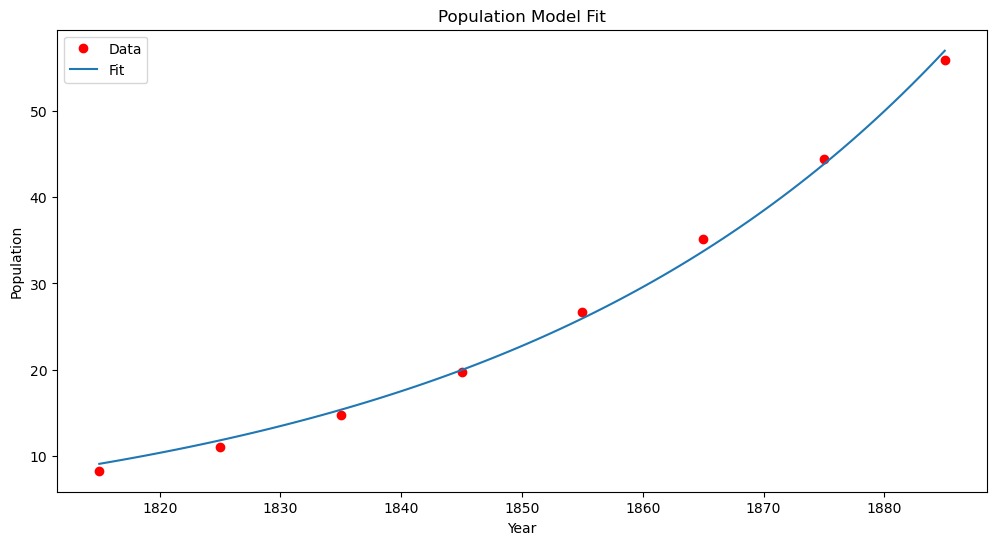

[1.99930662e-20 2.62076639e-02]


In [ ]:
# Use scipy curve_fit
from scipy.optimize import curve_fit

x0 = np.array([np.exp(intercept), slope])

def population_model_scipy(t, a, b):
    return a*np.exp(b*t)

t = population_data[:,0]
y = population_data[:,1]

popt, pcov = curve_fit(population_model_scipy, t, y, p0=x0)

t_fit = np.linspace(1815, 1885,100)
y_fit = population_model_scipy(t_fit, *popt)

plt.figure(figsize=(12,6))
plt.plot(t,y,'ro', label='Data')
plt.plot(t_fit,y_fit, label='Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Model Fit')
plt.legend()
plt.show()

print(popt)

Ok this is somewhat problematic i think, with the starting values (6,0.3) this never converges, so i think you have to use the ones obtained by the linearization

New Initial Guess
x1: 1.2855867936783748e-21
x2: 0.027680385400986777
[1.99930202e-20 2.62076651e-02]


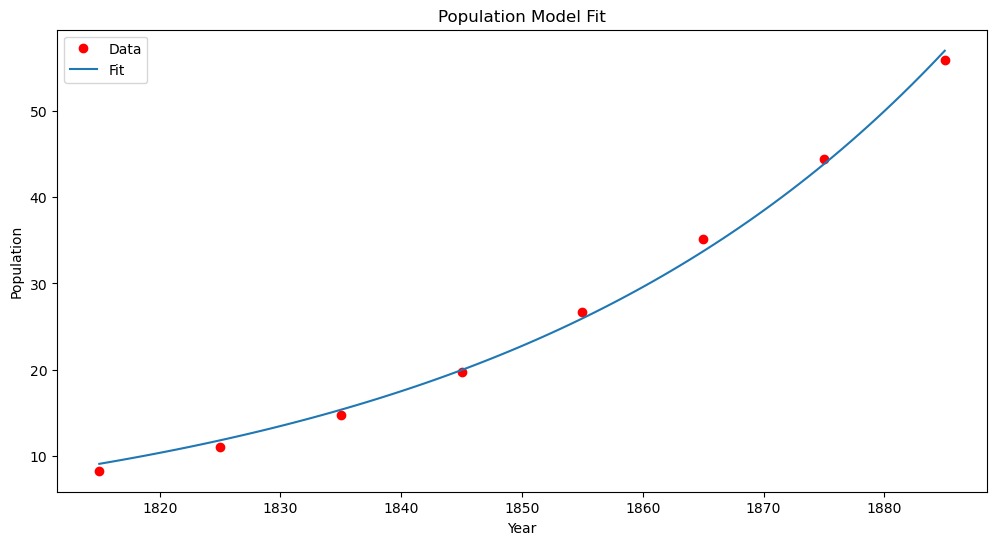

In [398]:
# Fit Population Model with New Initial Guess
print("New Initial Guess")
print(f"x1: {np.exp(intercept)}")
print(f"x2: {slope}")

x0 = np.array([np.exp(intercept), slope])
t = population_data[:,0]
y = population_data[:,1]

x_population = gauss_newton(x0,t,y,residuals_population,jacobian_population)
print(x_population)

# Plot the population model

t_fit = np.linspace(1815, 1885,100)
y_fit = population_model(x_population,t_fit)

plt.figure(figsize=(12,6))
plt.plot(t,y,'ro', label='Data')
plt.plot(t_fit,y_fit, label='Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Model Fit')
plt.legend()
plt.show()
